> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, we will investigate the relationship between moving revenue with following variables:
  1. What characters are most important to contribute movie revenues? 
  2. Do movies with high ratings have higher revenues?
  3. Do directors have strong relationship with higher revenue?
  4. Do production companies with more films have strong relationship with higher revenue?

Upon reviewing the data, it's noted that there are more than half of the data have missing information on revenue (at column revenue and revenue_adj). 6016 samples out of 10866 total population do not have revenue information. Thus, based on the limitation of the available data, we would like to find the relationship between three variables and movie revenues. The three variables include average movie rating, directors and production companies. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# 1. Import data to have a grasp idea of data content before analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('https://www.dropbox.com/s/asekz4uszbmukbq/tmdb-movies_new.csv?dl=1')

In [4]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
# remove irrelevant information
df.drop(['id','homepage','tagline','overview','keywords','runtime'],axis=1, inplace=True)

In [9]:
# identify missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.2+ MB


In [10]:
# restructure the dataframe to move column 'revenue_adj' forward.
df=df[['imdb_id','popularity','budget_adj','revenue_adj','original_title','cast','director','genres','production_companies','release_date','vote_count','vote_average','release_year','budget','revenue']]

In [11]:
# Drop duplicate or blank imbd_id
df[df.duplicated(['imdb_id'], keep=False)]

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
548,NaN,0.108072,0.000000e+00,0.0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0,0
997,NaN,0.330431,0.000000e+00,0.0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,NaN,NaN,10/3/14,13,6.8,2014,0,0
1528,NaN,0.607851,0.000000e+00,0.0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,Frank Paur,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0,0
1750,NaN,0.256975,0.000000e+00,0.0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,Sam Liu,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0,0
2089,tt0411951,0.596430,3.000000e+07,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000,967000
2090,tt0411951,0.596430,3.000000e+07,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000,967000
2401,NaN,0.067753,0.000000e+00,0.0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",NaN,Music,NaN,9/21/10,10,8.6,2010,0,0
4797,NaN,0.167501,0.000000e+00,0.0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,BBC Television UK,12/25/12,10,7.8,2012,0,0
4872,NaN,0.090552,0.000000e+00,0.0,Party Bercy,Florence Foresti,NaN,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0,0
6071,NaN,0.004323,4.680167e+02,0.0,Portal: Survive!,Monique Blanchard|Bradley Mixon,Connor McGuire|Colin McGuire,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,500,0


In [12]:
df.drop_duplicates(['imdb_id'], keep="last", inplace=True)

In [13]:
df.shape  

(10856, 15)

In [14]:
df['revenue_adj'].median()

0.0

In [15]:
# Understand how many rows with zero revenue
df_zero = df [df['revenue_adj']==0]
df_zero.count()

imdb_id                 6006
popularity              6007
budget_adj              6007
revenue_adj             6007
original_title          6007
cast                    5936
director                5968
genres                  5986
production_companies    5077
release_date            6007
vote_count              6007
vote_average            6007
release_year            6007
budget                  6007
revenue                 6007
dtype: int64

In [16]:
 df_zero[['release_year','revenue_adj']].groupby('release_year').count()

,revenue_adj
release_year,
1960,25
1961,21
1962,23
1963,27
1964,34
1965,30
1966,41
1967,26
1968,27


In [17]:
df[['release_year','revenue_adj']].groupby('release_year').count()

,revenue_adj
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42
1965,35
1966,46
1967,40
1968,39


In [18]:
df.drop(df[df['revenue_adj'] == 0].index, inplace=True)

In [19]:
df[df['imdb_id'] == 'tt0369610']['original_title']

0    Jurassic World
Name: original_title, dtype: object

In [20]:
df.shape

(4849, 15)

In [21]:
df.describe()

,popularity,budget_adj,revenue_adj,vote_count,vote_average,release_year,budget,revenue
count,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,1.045202,3.516208e+07,1.151009e+08,436.283151,6.149000,2000.919777,2.956961e+07,8.923886e+07
std,1.356752,4.376117e+07,1.988557e+08,806.485754,0.798707,11.569650,4.051761e+07,1.620801e+08
min,0.001117,0.000000e+00,2.370705e+00,10.000000,2.100000,1960.000000,0.000000e+00,2.000000e+00
25%,0.387740,2.329409e+06,1.046585e+07,46.000000,5.600000,1994.000000,1.700000e+06,7.732325e+06
50%,0.680581,2.032801e+07,4.395666e+07,147.000000,6.200000,2004.000000,1.500000e+07,3.185308e+07
75%,1.210502,4.973516e+07,1.316482e+08,435.000000,6.700000,2010.000000,4.000000e+07,9.996575e+07
max,32.985763,4.250000e+08,2.827124e+09,9767.000000,8.400000,2015.000000,4.250000e+08,2.781506e+09


In [22]:
df['revenue_adj'].median()

43956661.158377096

In [23]:
df['revenue_adj'].max()

2827123750.41189

In [24]:
df.tail()

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue
10822,tt0061184,0.670274,5.038511e+07,2.266436e+08,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,Drama,Chenault Productions,6/21/66,74,7.5,1966,7500000,33736689
10828,tt0061107,0.402730,2.015404e+07,8.733419e+07,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,3000000,13000000
10829,tt0061619,0.395668,3.125892e+07,4.030809e+07,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,4653000,6000000
10835,tt0060934,0.299911,8.061618e+07,1.343603e+08,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,12000000,20000000
10848,tt0060397,0.207257,3.436265e+07,8.061618e+07,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,5115000,12000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 15 columns):
imdb_id                 4849 non-null object
popularity              4849 non-null float64
budget_adj              4849 non-null float64
revenue_adj             4849 non-null float64
original_title          4849 non-null object
cast                    4844 non-null object
director                4848 non-null object
genres                  4849 non-null object
production_companies    4753 non-null object
release_date            4849 non-null object
vote_count              4849 non-null int64
vote_average            4849 non-null float64
release_year            4849 non-null int64
budget                  4849 non-null int64
revenue                 4849 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 606.1+ KB


In [26]:
top_genres = df.sort_values(by='genres').groupby('genres').size().sort_values(ascending=False).head(20)
top_genres.head()

genres
Drama                   331
Comedy                  301
Drama|Romance           150
Comedy|Romance          144
Comedy|Drama|Romance    126
dtype: int64

In [30]:
# The data under "genre" is not so consistent, to simplify the analysis, only the first elements from the list of genres in individual row is selected.
df["first_genre"] = df["genres"].str.split("|", n=1, expand= True)
df["first_genre"].head()

0       Action
1       Action
2    Adventure
3       Action
4       Action
Name: first_genre, dtype: object

In [31]:
df.groupby('first_genre').size()

first_genre
Action              825
Adventure           353
Animation           120
Comedy             1050
Crime               206
Documentary          88
Drama              1157
Family               49
Fantasy             136
History              21
Horror              324
Music                38
Mystery              52
Romance              84
Science Fiction     103
TV Movie              1
Thriller            199
War                  22
Western              21
dtype: int64

In [32]:
df.head()

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,first_genre
0,tt0369610,32.985763,1.379999e+08,1.392446e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,150000000,1513528810,Action
1,tt1392190,28.419936,1.379999e+08,3.481613e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,150000000,378436354,Action
2,tt2908446,13.112507,1.012000e+08,2.716190e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,110000000,295238201,Adventure
3,tt2488496,11.173104,1.839999e+08,1.902723e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,200000000,2068178225,Action
4,tt2820852,9.335014,1.747999e+08,1.385749e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,190000000,1506249360,Action


In [39]:
# Create new column "rev_level" for further analysis
rev_num = [0,43956661.158377096,2827123750.41189]
rev_name = ['low','high']
df['rev_level'] = pd.cut(df['revenue_adj'], rev_num, labels=rev_name)

In [40]:
def get_low_revenue_data(df):
    return df[df['rev_level']=='low']

def get_high_revenue_data(df):
    return df[df['rev_level']=='high']

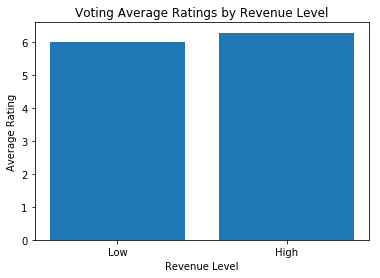

In [42]:
# Create a bar chart with proper labels
mean_quality_low = get_low_revenue_data(df).vote_average.mean()
mean_quality_high = get_high_revenue_data(df).vote_average.mean()
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Voting Average Ratings by Revenue Level')
plt.xlabel('Revenue Level')
plt.ylabel('Average Rating');

In [43]:
df.sort_values(by=['revenue_adj'], ascending=[False]).head(5)

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,first_genre,rev_level
1386,tt0499549,9.432768,2.408869e+08,2.827124e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,237000000,2781505847,Action,high
1329,tt0076759,12.037933,3.957559e+07,2.789712e+09,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,11000000,775398007,Adventure,high
5231,tt0120338,4.355219,2.716921e+08,2.506406e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,200000000,1845034188,Drama,high
10594,tt0070047,2.010733,3.928928e+07,2.167325e+09,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,8000000,441306145,Drama,high
9806,tt0073195,2.563191,2.836275e+07,1.907006e+09,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,7000000,470654000,Horror,high


In [44]:
top_directors = df.sort_values(by='director').groupby('director').size().sort_values(ascending=False).head(20)
top_directors

director
Steven Spielberg     27
Clint Eastwood       26
Ridley Scott         22
Woody Allen          22
Ron Howard           18
Martin Scorsese      18
Steven Soderbergh    17
Joel Schumacher      16
Tony Scott           16
Tim Burton           16
Renny Harlin         15
Rob Reiner           15
Robert Zemeckis      15
Oliver Stone         15
Brian De Palma       15
Wes Craven           15
Walter Hill          14
Richard Donner       14
Barry Levinson       14
John Carpenter       13
dtype: int64

In [45]:
data_top_directors = df.loc[df['director'].isin(top_directors.index.values)]
data_top_directors

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,first_genre,rev_level
7,tt3659388,7.667400,9.935996e+07,5.477497e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,108000000,595380321,Drama,high
33,tt3682448,3.648210,3.679998e+07,1.496016e+08,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,40000000,162610473,Thriller,high
66,tt1390411,2.345821,9.199996e+07,8.631506e+07,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,11/20/15,805,6.4,2015,100000000,93820758,Thriller,high
83,tt3488710,2.049886,3.219999e+07,5.628736e+07,The Walk,Joseph Gordon-Levitt|Ben Kingsley|Charlotte Le...,Robert Zemeckis,Adventure|Drama|Thriller,TriStar Pictures|Sony Pictures Entertainment|I...,9/30/15,706,6.8,2015,35000000,61181942,Adventure,high
155,tt3715320,1.007054,1.012000e+07,2.519979e+07,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,Mystery|Drama,Sony Pictures|Gravier Productions,7/17/15,319,6.1,2015,11000000,27391084,Mystery,low
206,tt3164256,0.689579,1.379999e+07,2.779010e+06,Rock the Kasbah,Bill Murray|Zooey Deschanel|Bruce Willis|Kate ...,Barry Levinson,Comedy|Music|War,Shangri-La Entertainment|QED International|Dun...,10/22/15,56,5.1,2015,15000000,3020664,Comedy,low
443,tt4630444,0.219603,0.000000e+00,2.796799e+04,Being Charlie,Nick Robinson|Common|Cary Elwes|Devon Bostick|...,Rob Reiner,Drama|Romance,NaN,9/14/15,12,6.2,2015,0,30400,Drama,low
657,tt2179136,3.863074,5.416015e+07,4.995145e+08,American Sniper,Bradley Cooper|Sienna Miller|Kyle Gallner|Cole...,Clint Eastwood,War|Action,Village Roadshow Pictures|Malpaso Productions|...,12/11/14,3004,7.5,2014,58800000,542307423,War,high
658,tt1528100,3.813740,1.289527e+08,2.468817e+08,Exodus: Gods and Kings,Christian Bale|Joel Edgerton|John Turturro|Aar...,Ridley Scott,Adventure|Drama|Action,Scott Free Productions|Chernin Entertainment|B...,12/3/14,1377,5.6,2014,140000000,268031828,Adventure,high
733,tt1126590,1.398713,9.210911e+06,2.660434e+07,Big Eyes,Amy Adams|Christoph Waltz|Krysten Ritter|Danny...,Tim Burton,Drama,The Weinstein Company|Silverwood Films|Electri...,12/24/14,710,6.8,2014,10000000,28883511,Drama,low


In [46]:
data_top_directors.describe()

,popularity,budget_adj,revenue_adj,vote_count,vote_average,release_year,budget,revenue
count,343.000000,3.430000e+02,3.430000e+02,343.000000,343.000000,343.000000,3.430000e+02,3.430000e+02
mean,1.216790,5.426934e+07,1.855399e+08,591.125364,6.445481,1996.125364,4.199841e+07,1.282436e+08
std,1.066994,4.483018e+07,2.450175e+08,797.998677,0.730798,10.939976,3.976736e+07,1.564187e+08
min,0.064029,0.000000e+00,1.694411e+04,10.000000,4.400000,1971.000000,0.000000e+00,1.747900e+04
25%,0.543180,2.046478e+07,3.409453e+07,91.000000,6.000000,1988.000000,1.400000e+07,2.108294e+07
50%,0.891372,4.339136e+07,9.640942e+07,263.000000,6.500000,1996.000000,3.000000e+07,6.597730e+07
75%,1.479205,7.849070e+07,2.356080e+08,748.000000,6.900000,2005.000000,6.250000e+07,1.717418e+08
max,7.667400,2.032801e+08,1.907006e+09,4856.000000,8.100000,2015.000000,2.000000e+08,1.025467e+09


In [47]:
df.groupby(['director', 'rev_level']).size().head(100)

director                                                              rev_level
 FrÃ©dÃ©ric Jardin                                                    low          1
A.R. Murugadoss                                                       high         1
Aaron Blaise|Robert Walker                                            low          1
Aaron Moorhead|Justin Benson                                          low          1
Aaron Norris                                                          low          4
Aaron Seltzer|Jason Friedberg                                         high         1
Abbas Tyrewala                                                        low          1
Abe Sylvia                                                            low          1
Abel Ferrara                                                          low          4
Adam Brooks                                                           high         1
Adam Green                                                            

In [48]:
df_dir = data_top_directors

In [49]:
df_dir[df_dir['rev_level']== 'high'].count() 

imdb_id                 247
popularity              247
budget_adj              247
revenue_adj             247
original_title          247
cast                    247
director                247
genres                  247
production_companies    247
release_date            247
vote_count              247
vote_average            247
release_year            247
budget                  247
revenue                 247
first_genre             247
rev_level               247
dtype: int64

Text(0,0.5,'Number of Movies by Top Directors')

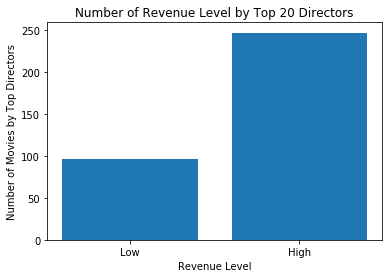

In [50]:
# Create a bar chart with proper labels
dir_rev_low = get_low_revenue_data(df_dir).revenue_adj.count()    
dir_rev_high = get_high_revenue_data(df_dir).revenue_adj.count()
locations = [1, 2]
heights = [dir_rev_low, dir_rev_high]
labels = ['Low', 'High']
plt.bar (locations, heights, tick_label = labels)
plt.title ('Number of Revenue Level by Top 20 Directors')
plt.xlabel ('Revenue Level')
plt.ylabel ('Number of Movies by Top Directors')

In [51]:
top_production = df.sort_values(by='production_companies').groupby('production_companies').size().sort_values(ascending=False).head(20)
top_production

production_companies
Paramount Pictures                              107
Universal Pictures                               78
Columbia Pictures                                51
Warner Bros.                                     48
New Line Cinema                                  45
Metro-Goldwyn-Mayer (MGM)                        38
Touchstone Pictures                              32
Walt Disney Pictures                             31
Twentieth Century Fox Film Corporation           31
20th Century Fox                                 29
Orion Pictures                                   25
TriStar Pictures                                 22
Columbia Pictures Corporation                    19
Dimension Films                                  19
Miramax Films                                    18
United Artists                                   17
DreamWorks Animation                             15
Imagine Entertainment|Universal Pictures         13
Walt Disney Pictures|Pixar Animation Studio

In [52]:
data_top_production = df.loc[df['production_companies'].isin(top_production.index.values)]
data_top_production

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,first_genre,rev_level
672,tt1911658,3.007018,1.215840e+08,3.440755e+08,Penguins of Madagascar,Tom McGrath|Chris Miller|Christopher Knights|C...,Simon J. Smith|Eric Darnell,Family|Animation|Adventure|Comedy,DreamWorks Animation,11/22/14,939,6.5,2014,132000000,373552094,Family,high
708,tt0864835,1.894706,1.335582e+08,2.513772e+08,Mr. Peabody & Sherman,Ty Burrell|Max Charles|Ariel Winter|Allison Ja...,Rob Minkoff,Animation|Adventure|Family,20th Century Fox,2/7/14,592,6.8,2014,145000000,272912430,Animation,high
803,tt1742044,0.797723,3.684364e+07,6.203273e+07,Jersey Boys,Christopher Walken|Vincent Piazza|Freya Tingle...,Clint Eastwood,Music|Drama,Warner Bros.,6/5/14,181,6.7,2014,40000000,67347013,Music,high
805,tt1647668,0.786398,2.302728e+07,3.528481e+07,Million Dollar Arm,Jon Hamm|Bill Paxton|Lake Bell|Suraj Sharma|Aa...,Craig Gillespie,Drama,Walt Disney Pictures,5/9/14,182,6.6,2014,25000000,38307627,Drama,low
1332,tt0075686,1.179653,1.439112e+07,1.376203e+08,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,Comedy|Drama|Romance,United Artists,4/19/77,493,7.6,1977,4000000,38251425,Comedy,high
1342,tt0076729,0.541642,0.000000e+00,4.559735e+08,Smokey and the Bandit,Burt Reynolds|Sally Field|Jerry Reed|Jackie Gl...,Hal Needham,Action|Adventure|Comedy,Universal Pictures,5/26/77,93,6.9,1977,0,126737428,Action,high
1347,tt0076723,0.407317,0.000000e+00,1.007379e+08,Slap Shot,Paul Newman|Strother Martin|Michael Ontkean|Je...,George Roy Hill,Drama|Comedy,Universal Pictures,2/25/77,49,7.3,1977,0,28000000,Drama,high
1351,tt0076009,0.375967,5.036893e+07,1.106287e+08,Exorcist II: The Heretic,Linda Blair|Richard Burton|Louise Fletcher|Max...,John Boorman,Horror|Thriller|Fantasy,Warner Bros.,6/17/77,56,4.6,1977,14000000,30749142,Horror,high
1352,tt0075648,0.373131,2.158669e+07,1.079334e+08,Airport '77,Jack Lemmon|Lee Grant|Brenda Vaccaro|Joseph Co...,Jerry Jameson,Action|Adventure|Drama|Thriller,Universal Pictures,3/11/77,25,5.7,1977,6000000,30000000,Action,high
1366,tt0076489,0.078067,0.000000e+00,1.499816e+08,"Oh, God!",John Denver|George Burns|Teri Garr|Donald Plea...,Carl Reiner,Fantasy|Comedy,Warner Bros.,10/7/77,15,5.6,1977,0,41687243,Fantasy,high


In [53]:
data_top_production.describe()

,popularity,budget_adj,revenue_adj,vote_count,vote_average,release_year,budget,revenue
count,663.000000,6.630000e+02,6.630000e+02,663.000000,663.000000,663.000000,6.630000e+02,6.630000e+02
mean,0.782209,3.387998e+07,1.308384e+08,298.187029,6.115385,1992.939668,2.502176e+07,8.601614e+07
std,0.782651,4.011550e+07,1.989751e+08,618.428491,0.788650,10.740385,3.628485e+07,1.458541e+08
min,0.017498,0.000000e+00,8.585801e+00,10.000000,3.300000,1961.000000,0.000000e+00,3.000000e+00
25%,0.323822,1.768334e+06,2.615364e+07,34.000000,5.600000,1986.000000,1.000000e+06,1.544920e+07
50%,0.548575,2.212669e+07,6.274580e+07,87.000000,6.200000,1993.000000,1.400000e+07,3.661161e+07
75%,0.927481,4.516375e+07,1.441177e+08,239.500000,6.700000,2001.000000,3.000000e+07,8.696521e+07
max,6.715966,2.469335e+08,1.791694e+09,6137.000000,8.100000,2014.000000,2.600000e+08,1.108561e+09


In [54]:
df_pro = data_top_production

Text(0,0.5,'Number of Movies by Top Production Companies')

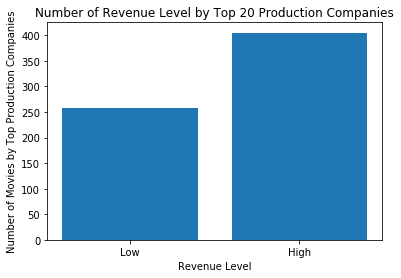

In [55]:
# Create a bar chart with proper labels
pro_rev_low = get_low_revenue_data(df_pro).revenue_adj.count()    
pro_rev_high = get_high_revenue_data(df_pro).revenue_adj.count()
locations = [1, 2]
heights = [pro_rev_low, pro_rev_high]
labels = ['Low', 'High']
plt.bar (locations, heights, tick_label = labels)
plt.title ('Number of Revenue Level by Top 20 Production Companies')
plt.xlabel ('Revenue Level')
plt.ylabel ('Number of Movies by Top Production Companies')    

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [56]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# restructure the dataframe to move column 'revenue_adj' forward.
df=df[['imdb_id','popularity','budget_adj','revenue_adj','original_title','cast','director','genres','production_companies','release_date','vote_count','vote_average','release_year','budget','revenue']]

In [57]:
# Drop duplicate or blank imbd_id and view
df[df.duplicated(['imdb_id'], keep=False)]

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue


In [58]:
# perform the drop function on duplicate or blank imbd_id 
df.drop_duplicates(['imdb_id'], keep="last", inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
df.shape  

(4849, 15)

In [60]:
df['revenue_adj'].median()

43956661.158377096

In [61]:
# Understand how many rows with zero revenue
df_zero = df [df['revenue_adj']==0]
df_zero.count()

imdb_id                 0
popularity              0
budget_adj              0
revenue_adj             0
original_title          0
cast                    0
director                0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget                  0
revenue                 0
dtype: int64

In [62]:
# Understand if the zero revenue mainly from earlier years, but it seems not.
df_zero[['release_year','revenue_adj']].groupby('release_year').count()

,revenue_adj
release_year,


In [63]:
# Gain a grasp idea about where is the majority data of revenue (mainly from later years)
df[['release_year','revenue_adj']].groupby('release_year').count()

,revenue_adj
release_year,
1960,7
1961,10
1962,9
1963,7
1964,8
1965,5
1966,5
1967,14
1968,12


In [64]:
# Drop data with zero revenue
df.drop(df[df['revenue_adj'] == 0].index, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
df.shape    # after drop, 10866 samples reduced to 4849 samples

(4849, 15)

In [66]:
df.describe()

,popularity,budget_adj,revenue_adj,vote_count,vote_average,release_year,budget,revenue
count,4849.000000,4.849000e+03,4.849000e+03,4849.000000,4849.000000,4849.000000,4.849000e+03,4.849000e+03
mean,1.045202,3.516208e+07,1.151009e+08,436.283151,6.149000,2000.919777,2.956961e+07,8.923886e+07
std,1.356752,4.376117e+07,1.988557e+08,806.485754,0.798707,11.569650,4.051761e+07,1.620801e+08
min,0.001117,0.000000e+00,2.370705e+00,10.000000,2.100000,1960.000000,0.000000e+00,2.000000e+00
25%,0.387740,2.329409e+06,1.046585e+07,46.000000,5.600000,1994.000000,1.700000e+06,7.732325e+06
50%,0.680581,2.032801e+07,4.395666e+07,147.000000,6.200000,2004.000000,1.500000e+07,3.185308e+07
75%,1.210502,4.973516e+07,1.316482e+08,435.000000,6.700000,2010.000000,4.000000e+07,9.996575e+07
max,32.985763,4.250000e+08,2.827124e+09,9767.000000,8.400000,2015.000000,4.250000e+08,2.781506e+09


In [67]:
# Use median to define high and low revenue
df['revenue_adj'].median()

43956661.158377096

In [68]:
df['revenue_adj'].max()

2827123750.41189

In [69]:
# Create new column "rev_level" for further analysis
rev_num = [0,43956661.158377096,2827123750.41189]
rev_name = ['low','high']
df['rev_level'] = pd.cut(df['revenue_adj'], rev_num, labels=rev_name)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [70]:
# Use tail to see if the column is successfully added.
df.tail()

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,rev_level
10822,tt0061184,0.670274,5.038511e+07,2.266436e+08,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,Drama,Chenault Productions,6/21/66,74,7.5,1966,7500000,33736689,high
10828,tt0061107,0.402730,2.015404e+07,8.733419e+07,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,3000000,13000000,high
10829,tt0061619,0.395668,3.125892e+07,4.030809e+07,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,4653000,6000000,low
10835,tt0060934,0.299911,8.061618e+07,1.343603e+08,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,12000000,20000000,high
10848,tt0060397,0.207257,3.436265e+07,8.061618e+07,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,5115000,12000000,high


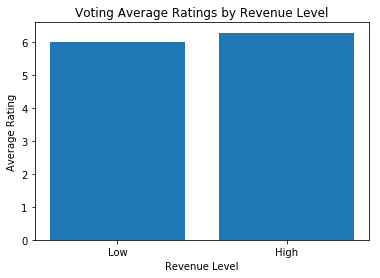

In [71]:
# Create a bar chart to see the relationship between revenue level and average rating.
mean_quality_low = get_low_revenue_data(df).vote_average.mean()
mean_quality_high = get_high_revenue_data(df).vote_average.mean()
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Voting Average Ratings by Revenue Level')
plt.xlabel('Revenue Level')
plt.ylabel('Average Rating');
# The result indicates that high revenue level has slightly higher average rating than low revenue level. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Do directors have strong relationship with higher revenue?)

In [72]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Q3: Do directors have strong relationship with higher revenue?

In [73]:
# Sort revenue_adj to view directors
df.sort_values(by=['revenue_adj'], ascending=[False]).head(5)

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,rev_level
1386,tt0499549,9.432768,2.408869e+08,2.827124e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,237000000,2781505847,high
1329,tt0076759,12.037933,3.957559e+07,2.789712e+09,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,11000000,775398007,high
5231,tt0120338,4.355219,2.716921e+08,2.506406e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,200000000,1845034188,high
10594,tt0070047,2.010733,3.928928e+07,2.167325e+09,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,8000000,441306145,high
9806,tt0073195,2.563191,2.836275e+07,1.907006e+09,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,7000000,470654000,high


In [74]:
# As there are too many directors, we perform analysis based on top directors who perform the most films in past years.
top_directors = df.sort_values(by='director').groupby('director').size().sort_values(ascending=False).head(20)
top_directors

director
Steven Spielberg     27
Clint Eastwood       26
Ridley Scott         22
Woody Allen          22
Ron Howard           18
Martin Scorsese      18
Steven Soderbergh    17
Joel Schumacher      16
Tony Scott           16
Tim Burton           16
Renny Harlin         15
Rob Reiner           15
Robert Zemeckis      15
Oliver Stone         15
Brian De Palma       15
Wes Craven           15
Walter Hill          14
Richard Donner       14
Barry Levinson       14
John Carpenter       13
dtype: int64

Text(0.5,1,'Number of Movies by Top 20 Directors')

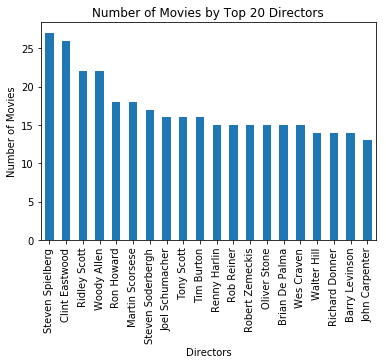

In [75]:
ax = top_directors.plot.bar()
ax.set_xlabel('Directors')
ax.set_ylabel('Number of Movies')
ax.set_title('Number of Movies by Top 20 Directors')

In [76]:
# Create a dataframe with only top 20 directors
data_top_directors = df.loc[df['director'].isin(top_directors.index.values)]
data_top_directors

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,rev_level
7,tt3659388,7.667400,9.935996e+07,5.477497e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,108000000,595380321,high
33,tt3682448,3.648210,3.679998e+07,1.496016e+08,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,40000000,162610473,high
66,tt1390411,2.345821,9.199996e+07,8.631506e+07,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,11/20/15,805,6.4,2015,100000000,93820758,high
83,tt3488710,2.049886,3.219999e+07,5.628736e+07,The Walk,Joseph Gordon-Levitt|Ben Kingsley|Charlotte Le...,Robert Zemeckis,Adventure|Drama|Thriller,TriStar Pictures|Sony Pictures Entertainment|I...,9/30/15,706,6.8,2015,35000000,61181942,high
155,tt3715320,1.007054,1.012000e+07,2.519979e+07,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,Mystery|Drama,Sony Pictures|Gravier Productions,7/17/15,319,6.1,2015,11000000,27391084,low
206,tt3164256,0.689579,1.379999e+07,2.779010e+06,Rock the Kasbah,Bill Murray|Zooey Deschanel|Bruce Willis|Kate ...,Barry Levinson,Comedy|Music|War,Shangri-La Entertainment|QED International|Dun...,10/22/15,56,5.1,2015,15000000,3020664,low
443,tt4630444,0.219603,0.000000e+00,2.796799e+04,Being Charlie,Nick Robinson|Common|Cary Elwes|Devon Bostick|...,Rob Reiner,Drama|Romance,NaN,9/14/15,12,6.2,2015,0,30400,low
657,tt2179136,3.863074,5.416015e+07,4.995145e+08,American Sniper,Bradley Cooper|Sienna Miller|Kyle Gallner|Cole...,Clint Eastwood,War|Action,Village Roadshow Pictures|Malpaso Productions|...,12/11/14,3004,7.5,2014,58800000,542307423,high
658,tt1528100,3.813740,1.289527e+08,2.468817e+08,Exodus: Gods and Kings,Christian Bale|Joel Edgerton|John Turturro|Aar...,Ridley Scott,Adventure|Drama|Action,Scott Free Productions|Chernin Entertainment|B...,12/3/14,1377,5.6,2014,140000000,268031828,high
733,tt1126590,1.398713,9.210911e+06,2.660434e+07,Big Eyes,Amy Adams|Christoph Waltz|Krysten Ritter|Danny...,Tim Burton,Drama,The Weinstein Company|Silverwood Films|Electri...,12/24/14,710,6.8,2014,10000000,28883511,low


In [77]:
data_top_directors.describe()

,popularity,budget_adj,revenue_adj,vote_count,vote_average,release_year,budget,revenue
count,343.000000,3.430000e+02,3.430000e+02,343.000000,343.000000,343.000000,3.430000e+02,3.430000e+02
mean,1.216790,5.426934e+07,1.855399e+08,591.125364,6.445481,1996.125364,4.199841e+07,1.282436e+08
std,1.066994,4.483018e+07,2.450175e+08,797.998677,0.730798,10.939976,3.976736e+07,1.564187e+08
min,0.064029,0.000000e+00,1.694411e+04,10.000000,4.400000,1971.000000,0.000000e+00,1.747900e+04
25%,0.543180,2.046478e+07,3.409453e+07,91.000000,6.000000,1988.000000,1.400000e+07,2.108294e+07
50%,0.891372,4.339136e+07,9.640942e+07,263.000000,6.500000,1996.000000,3.000000e+07,6.597730e+07
75%,1.479205,7.849070e+07,2.356080e+08,748.000000,6.900000,2005.000000,6.250000e+07,1.717418e+08
max,7.667400,2.032801e+08,1.907006e+09,4856.000000,8.100000,2015.000000,2.000000e+08,1.025467e+09


In [78]:
df_dir[df_dir['rev_level']== 'high'].count() 

imdb_id                 247
popularity              247
budget_adj              247
revenue_adj             247
original_title          247
cast                    247
director                247
genres                  247
production_companies    247
release_date            247
vote_count              247
vote_average            247
release_year            247
budget                  247
revenue                 247
first_genre             247
rev_level               247
dtype: int64

Text(0,0.5,'Number of Movies by Top Directors')

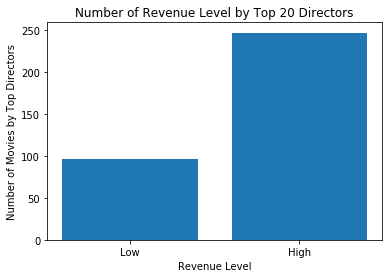

In [79]:
# Create a bar chart to see the relationship between top directors and revenue levels
dir_rev_low = get_low_revenue_data(df_dir).revenue_adj.count()    
dir_rev_high = get_high_revenue_data(df_dir).revenue_adj.count()
locations = [1, 2]
heights = [dir_rev_low, dir_rev_high]
labels = ['Low', 'High']
plt.bar (locations, heights, tick_label = labels)
plt.title ('Number of Revenue Level by Top 20 Directors')
plt.xlabel ('Revenue Level')
plt.ylabel ('Number of Movies by Top Directors')
# The result indicates that usually top directors have high revenue level (72%, 247 high revenue level of 343 of total top 20 directors'movies)

### Research Question 2  (Do production companies with more films have strong relationship with higher revenue?)

In [80]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Q4 :Do production companies with more films have strong relationship with higher revenue?

In [81]:
def groupby_count(df, name):
    return df.sort_values(name).groupby(name).size().sort_values(ascending=False).head(20)

In [82]:
top_production = df.sort_values(by='production_companies').groupby('production_companies').size().sort_values(ascending=False).head(20)
groupby_count(df, 'production_companies')

production_companies
Paramount Pictures                              107
Universal Pictures                               78
Columbia Pictures                                51
Warner Bros.                                     48
New Line Cinema                                  45
Metro-Goldwyn-Mayer (MGM)                        38
Touchstone Pictures                              32
Walt Disney Pictures                             31
Twentieth Century Fox Film Corporation           31
20th Century Fox                                 29
Orion Pictures                                   25
TriStar Pictures                                 22
Columbia Pictures Corporation                    19
Dimension Films                                  19
Miramax Films                                    18
United Artists                                   17
DreamWorks Animation                             15
Imagine Entertainment|Universal Pictures         13
Walt Disney Pictures|Pixar Animation Studio

In [83]:
top_production = df.sort_values(by='production_companies').groupby('production_companies').size().sort_values(ascending=False).head(20)
top_production

production_companies
Paramount Pictures                              107
Universal Pictures                               78
Columbia Pictures                                51
Warner Bros.                                     48
New Line Cinema                                  45
Metro-Goldwyn-Mayer (MGM)                        38
Touchstone Pictures                              32
Walt Disney Pictures                             31
Twentieth Century Fox Film Corporation           31
20th Century Fox                                 29
Orion Pictures                                   25
TriStar Pictures                                 22
Columbia Pictures Corporation                    19
Dimension Films                                  19
Miramax Films                                    18
United Artists                                   17
DreamWorks Animation                             15
Imagine Entertainment|Universal Pictures         13
Walt Disney Pictures|Pixar Animation Studio

In [84]:
data_top_production = df.loc[df['production_companies'].isin(top_production.index.values)]
data_top_production

,imdb_id,popularity,budget_adj,revenue_adj,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,rev_level
672,tt1911658,3.007018,1.215840e+08,3.440755e+08,Penguins of Madagascar,Tom McGrath|Chris Miller|Christopher Knights|C...,Simon J. Smith|Eric Darnell,Family|Animation|Adventure|Comedy,DreamWorks Animation,11/22/14,939,6.5,2014,132000000,373552094,high
708,tt0864835,1.894706,1.335582e+08,2.513772e+08,Mr. Peabody & Sherman,Ty Burrell|Max Charles|Ariel Winter|Allison Ja...,Rob Minkoff,Animation|Adventure|Family,20th Century Fox,2/7/14,592,6.8,2014,145000000,272912430,high
803,tt1742044,0.797723,3.684364e+07,6.203273e+07,Jersey Boys,Christopher Walken|Vincent Piazza|Freya Tingle...,Clint Eastwood,Music|Drama,Warner Bros.,6/5/14,181,6.7,2014,40000000,67347013,high
805,tt1647668,0.786398,2.302728e+07,3.528481e+07,Million Dollar Arm,Jon Hamm|Bill Paxton|Lake Bell|Suraj Sharma|Aa...,Craig Gillespie,Drama,Walt Disney Pictures,5/9/14,182,6.6,2014,25000000,38307627,low
1332,tt0075686,1.179653,1.439112e+07,1.376203e+08,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,Comedy|Drama|Romance,United Artists,4/19/77,493,7.6,1977,4000000,38251425,high
1342,tt0076729,0.541642,0.000000e+00,4.559735e+08,Smokey and the Bandit,Burt Reynolds|Sally Field|Jerry Reed|Jackie Gl...,Hal Needham,Action|Adventure|Comedy,Universal Pictures,5/26/77,93,6.9,1977,0,126737428,high
1347,tt0076723,0.407317,0.000000e+00,1.007379e+08,Slap Shot,Paul Newman|Strother Martin|Michael Ontkean|Je...,George Roy Hill,Drama|Comedy,Universal Pictures,2/25/77,49,7.3,1977,0,28000000,high
1351,tt0076009,0.375967,5.036893e+07,1.106287e+08,Exorcist II: The Heretic,Linda Blair|Richard Burton|Louise Fletcher|Max...,John Boorman,Horror|Thriller|Fantasy,Warner Bros.,6/17/77,56,4.6,1977,14000000,30749142,high
1352,tt0075648,0.373131,2.158669e+07,1.079334e+08,Airport '77,Jack Lemmon|Lee Grant|Brenda Vaccaro|Joseph Co...,Jerry Jameson,Action|Adventure|Drama|Thriller,Universal Pictures,3/11/77,25,5.7,1977,6000000,30000000,high
1366,tt0076489,0.078067,0.000000e+00,1.499816e+08,"Oh, God!",John Denver|George Burns|Teri Garr|Donald Plea...,Carl Reiner,Fantasy|Comedy,Warner Bros.,10/7/77,15,5.6,1977,0,41687243,high


In [85]:
data_top_production.describe()

,popularity,budget_adj,revenue_adj,vote_count,vote_average,release_year,budget,revenue
count,663.000000,6.630000e+02,6.630000e+02,663.000000,663.000000,663.000000,6.630000e+02,6.630000e+02
mean,0.782209,3.387998e+07,1.308384e+08,298.187029,6.115385,1992.939668,2.502176e+07,8.601614e+07
std,0.782651,4.011550e+07,1.989751e+08,618.428491,0.788650,10.740385,3.628485e+07,1.458541e+08
min,0.017498,0.000000e+00,8.585801e+00,10.000000,3.300000,1961.000000,0.000000e+00,3.000000e+00
25%,0.323822,1.768334e+06,2.615364e+07,34.000000,5.600000,1986.000000,1.000000e+06,1.544920e+07
50%,0.548575,2.212669e+07,6.274580e+07,87.000000,6.200000,1993.000000,1.400000e+07,3.661161e+07
75%,0.927481,4.516375e+07,1.441177e+08,239.500000,6.700000,2001.000000,3.000000e+07,8.696521e+07
max,6.715966,2.469335e+08,1.791694e+09,6137.000000,8.100000,2014.000000,2.600000e+08,1.108561e+09


In [86]:
df_pro = data_top_production

In [87]:
df_pro[df_pro['rev_level']== 'high'].count() 

imdb_id                 405
popularity              405
budget_adj              405
revenue_adj             405
original_title          405
cast                    405
director                405
genres                  405
production_companies    405
release_date            405
vote_count              405
vote_average            405
release_year            405
budget                  405
revenue                 405
rev_level               405
dtype: int64

Text(0,0.5,'Number of Movies by Top Production Companies')

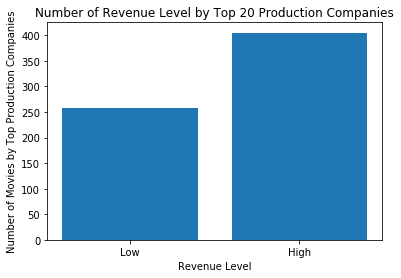

In [88]:
# Create a bar chart to see the relationship between top 20 production companies and revenue levels.
pro_rev_low = df_pro[df_pro['rev_level']=='low'].revenue_adj.count()    
pro_rev_high = df_pro[df_pro['rev_level']=='high'].revenue_adj.count()
locations = [1, 2]
heights = [pro_rev_low, pro_rev_high]
labels = ['Low', 'High']
plt.bar (locations, heights, tick_label = labels)
plt.title ('Number of Revenue Level by Top 20 Production Companies')
plt.xlabel ('Revenue Level')
plt.ylabel ('Number of Movies by Top Production Companies')  
# # The result indicates that some production companies with more output have high revenue level (61%, 405 high revenue level out of 663 total top 20 production companies'movies)

Text(0.5,1,'Overview of Revenue Level for Top 20 Companies')

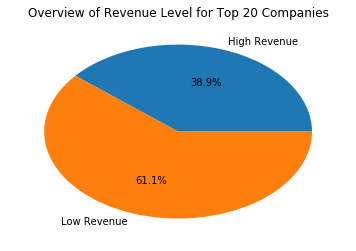

In [89]:
rev_lev = (pro_rev_low, pro_rev_high)
category = {'Low Revenue','High Revenue'}
plt.pie(rev_lev, labels=category, autopct='%1.1f%%')
plt.title('Overview of Revenue Level for Top 20 Companies')

In [90]:
### Research Question 3  (Do Voting rate has relationship with revenue?)

Text(0.5,1,'Vote Average vs. Movie Revenue')

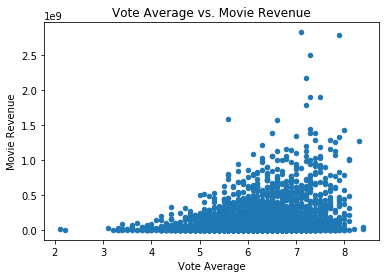

In [91]:
vote = df.plot(x='vote_average',y='revenue_adj',kind= 'scatter' )  #newly created on 14 Feb
vote.set_xlabel('Vote Average')
vote.set_ylabel('Movie Revenue')
vote.set_title('Vote Average vs. Movie Revenue')


In [ ]:
#The above scatter graph, we can see there is a trend where the higher vote rates, the more revenue presents).

In [96]:
### Research Question 4  (Do Certain Genres Have More Revenue?)
df["first_genre"] = df["genres"].str.split("|", n=1, expand = True)
df.groupby('first_genre').size()

first_genre
Action              825
Adventure           353
Animation           120
Comedy             1050
Crime               206
Documentary          88
Drama              1157
Family               49
Fantasy             136
History              21
Horror              324
Music                38
Mystery              52
Romance              84
Science Fiction     103
TV Movie              1
Thriller            199
War                  22
Western              21
dtype: int64

Text(0.5,1,'Overview of Revenues by Genres')

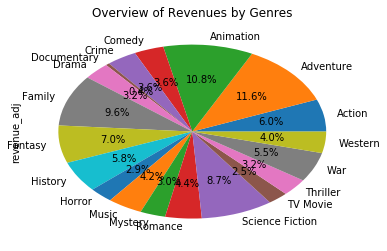

In [99]:
genre_revenue = df.groupby('first_genre').revenue_adj.mean()
genre_revenue.plot(kind='pie', autopct='%1.1f%%')
plt.title('Overview of Revenues by Genres')

In [ ]:
# The above pie chart indicate there is no dominant genres for higher movie revenues. The biggest revenue proportion is from Adventure (11.6%).
# However, due to the inconsistent and overlapping of genres at individual rows, I only took the first element of genres in each row. For example, "Animation" will be selected based on the genres of Animation|Adventure|Family. 

Text(0,0.5,'Average Revenue')

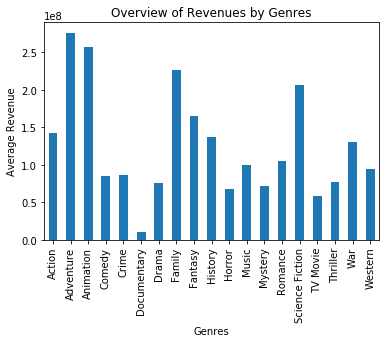

In [102]:
genre_revenue = df.groupby('first_genre').revenue_adj.mean()
genre_revenue.plot(kind='bar')
plt.title('Overview of Revenues by Genres')
plt.xlabel('Genres')
plt.ylabel('Average Revenue')

In [103]:
df.groupby('first_genre').revenue_adj.mean()

first_genre
Action             1.426376e+08
Adventure          2.764585e+08
Animation          2.576326e+08
Comedy             8.475980e+07
Crime              8.645347e+07
Documentary        1.055516e+07
Drama              7.587174e+07
Family             2.270164e+08
Fantasy            1.656752e+08
History            1.369488e+08
Horror             6.828551e+07
Music              1.002081e+08
Mystery            7.217042e+07
Romance            1.045478e+08
Science Fiction    2.067658e+08
TV Movie           5.838910e+07
Thriller           7.641153e+07
War                1.307201e+08
Western            9.461478e+07
Name: revenue_adj, dtype: float64

<a id='conclusions'></a>
## Conclusions

Limitation: 
1. As mentioned in the Introduction, due to the incomplete revenue information, only 4849 rows out of 10866 population is available for analysis.
2. Moreover, due to the inconsistent and overlapping of genres at individual rows, I only took the first element of genres in each row. For example, "Animation" will be selected based on the genres of Animation|Adventure|Family. 

> Regarding variable 1 of movie ratings , the result indicates that the movies with high revenue level have slightly higher averating rating than movies with low revenue level.

> Regarding variable 2 of top directors with more movies performed, based on the top 20 directors'data, the result indicates that the movies directed by these directors have strong relationship (72%) with high revenue level. 

> Regarding variable 3 of top production companies with more movies produced, based on the top 20 production companies, the result indicates that the movies produced by these production companies have relevant relationship (61%) with high revenue level.
> Regarding additional variable 4 of genres, it seems is no dominant genres for higher movie revenues. The biggest revenue proportion is from Adventure with only 11.6% among all movies with valid revenue figures.

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0